In [1]:
from prepare import prep_titanic_data, prep_telco_data, prep_iris_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [2]:
df = acquire.new_titanic_data()

In [3]:
train, validate, test = prep_titanic_data(df)

Train:(498, 10)
Test:(179, 10)
Val: (214, 10)
Train Titanic Data:
     survived  pclass   age  sibsp  parch      fare  alone  sex_male  \
583         0       1  36.0      0      0   40.1250      1         1   
165         1       3   9.0      0      2   20.5250      0         1   
50          0       3   7.0      4      1   39.6875      0         1   
259         1       2  50.0      0      1   26.0000      0         0   
306         1       1   NaN      0      0  110.8833      1         0   
..        ...     ...   ...    ...    ...       ...    ...       ...   
313         0       3  28.0      0      0    7.8958      1         1   
636         0       3  32.0      0      0    7.9250      1         1   
222         0       3  51.0      0      0    8.0500      1         1   
485         0       3   NaN      3      1   25.4667      0         0   
744         1       3  31.0      0      0    7.9250      1         1   

     embark_town_Queenstown  embark_town_Southampton  
583           

### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [4]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):

    train_validate, test = train_test_split(df, test_size=1, 
                                            random_state=seed, 
                                            stratify=df['survived'])
    train, validate = train_test_split(train_validate, test_size=1, 
                                       random_state=seed,
                                       stratify=train_validate['survived'])
    return train, validate, test


In [5]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [6]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)


In [7]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=123)

#### feature importances

In [8]:
print(rf.feature_importances_)


[0.08993337 0.21731088 0.0563468  0.0280238  0.23875337 0.01848333
 0.31234081 0.01510919 0.02369845]


### Evaluate your results using the model score, confusion matrix, and classification report.

#### baseline

In [9]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [10]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

#### predictions and probability

In [11]:
y_pred = rf.predict(X_train)
y_pred[0:5]


array([0, 1, 0, 1, 1])

In [12]:
y_pred_val = rf.predict(X_validate)

In [13]:
y_pred_val

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [14]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.75904339, 0.24095661],
       [0.24      , 0.76      ],
       [0.97277244, 0.02722756],
       [0.01647059, 0.98352941],
       [0.01      , 0.99      ]])

#### model score

In [15]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    train_score = round(rf.score(X_train, y_train), 2)
    validate_score = round(rf.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score
    
    model_set.append(rf)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_difference': score_difference
    })



In [16]:
leaf1depth10 = pd.DataFrame(model_accuracies)

#### confusion matrix

In [17]:
cm = confusion_matrix(y_train, y_pred)


In [18]:
cm

array([[307,   0],
       [ 15, 176]])

#### classification report

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



In [20]:
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       132
           1       0.78      0.72      0.75        82

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



#### visual

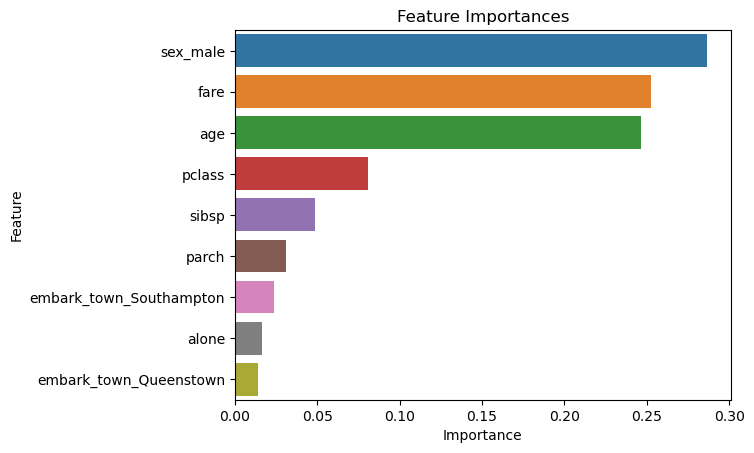

In [21]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances })

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot( y=feature_importances['Feature'], x=feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')


plt.title('Feature Importances')
plt.show()

### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [22]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)


,metric,score
0,accuracy,0.969880
1,true_positive_rate,0.921466
2,false_positive_rate,0.000000
3,true_negative_rate,1.000000
4,false_negative_rate,0.078534
5,precision,1.000000
6,recall,0.921466
7,f1_score,0.959128
8,support_pos,191.000000
9,support_neg,307.000000


### Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [23]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)


In [24]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#### feature importances

In [25]:
print(rf.feature_importances_)


[0.12089755 0.09351188 0.05629867 0.02155358 0.15997205 0.02277461
 0.49375382 0.01246822 0.01876962]


### Evaluate your results using the model score, confusion matrix, and classification report.

#### baseline

In [26]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [27]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

#### predictions and probability

In [28]:
y_pred = rf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 1, 1])

In [29]:
y_pred_val = rf.predict(X_validate)

In [30]:
y_pred_val

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [31]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.63073427, 0.36926573],
       [0.59410158, 0.40589842],
       [0.87948101, 0.12051899],
       [0.10083864, 0.89916136],
       [0.03270572, 0.96729428]])

#### model score

In [32]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    train_score = round(rf.score(X_train, y_train), 2)
    validate_score = round(rf.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score
    
    model_set.append(rf)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_difference': score_difference
    })



In [33]:
leaf3depth5 = pd.DataFrame(model_accuracies)

In [34]:
leaf3depth5

,max_depth,train_score,validate_score,score_difference
0,1,0.78,0.76,0.02
1,2,0.82,0.78,0.04
2,3,0.84,0.80,0.04
3,4,0.85,0.80,0.05
4,5,0.87,0.81,0.06
5,6,0.90,0.82,0.08
6,7,0.92,0.82,0.10
7,8,0.94,0.82,0.12
8,9,0.96,0.82,0.14
9,10,0.97,0.83,0.14


#### confusion matrix

In [35]:
cm = confusion_matrix(y_train, y_pred)


In [36]:
cm

array([[294,  13],
       [ 56, 135]])

#### classification report

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       307
           1       0.91      0.71      0.80       191

    accuracy                           0.86       498
   macro avg       0.88      0.83      0.85       498
weighted avg       0.87      0.86      0.86       498



In [38]:
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       132
           1       0.80      0.63      0.71        82

    accuracy                           0.80       214
   macro avg       0.80      0.77      0.78       214
weighted avg       0.80      0.80      0.79       214



#### visual

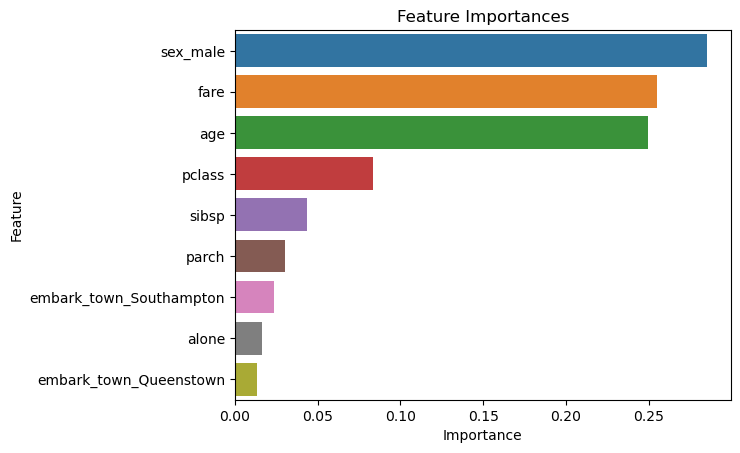

In [39]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances })

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot( y=feature_importances['Feature'], x=feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')


plt.title('Feature Importances')
plt.show()

### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [40]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)


,metric,score
0,accuracy,0.861446
1,true_positive_rate,0.706806
2,false_positive_rate,0.042345
3,true_negative_rate,0.957655
4,false_negative_rate,0.293194
5,precision,0.912162
6,recall,0.706806
7,f1_score,0.796460
8,support_pos,191.000000
9,support_neg,307.000000


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [53]:
leaf1depth10[9:10]

,max_depth,train_score,validate_score,score_difference
9,10,0.97,0.82,0.15


In [54]:
leaf3depth5[4:5]

,max_depth,train_score,validate_score,score_difference
4,5,0.87,0.81,0.06


#### Leaf 3 and max depth 5 is the best with 0.87 train score, 0.81 validation score, and score diff of .06 comepared to Leaf 1 Max depth 10 which had train score 0.97, validation score 0.82, and score diff of 0.15

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [55]:
leaf1depth10

,max_depth,train_score,validate_score,score_difference
0,1,0.78,0.77,0.01
1,2,0.82,0.77,0.05
2,3,0.85,0.80,0.05
3,4,0.86,0.80,0.06
4,5,0.86,0.80,0.06
5,6,0.89,0.81,0.08
6,7,0.92,0.83,0.09
7,8,0.94,0.82,0.12
8,9,0.96,0.83,0.13
9,10,0.97,0.82,0.15


In [56]:
leaf3depth5

,max_depth,train_score,validate_score,score_difference
0,1,0.78,0.76,0.02
1,2,0.82,0.78,0.04
2,3,0.84,0.80,0.04
3,4,0.85,0.80,0.05
4,5,0.87,0.81,0.06
5,6,0.90,0.82,0.08
6,7,0.92,0.82,0.10
7,8,0.94,0.82,0.12
8,9,0.96,0.82,0.14
9,10,0.97,0.83,0.14


#### Leaf 1 and max depth 1 is the best with 0.78 trains score, 0.77 validate score, and score diff of .01